<a href="https://colab.research.google.com/github/FeritMario/Obrada-slike-projekt/blob/main/Obrada%20slike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

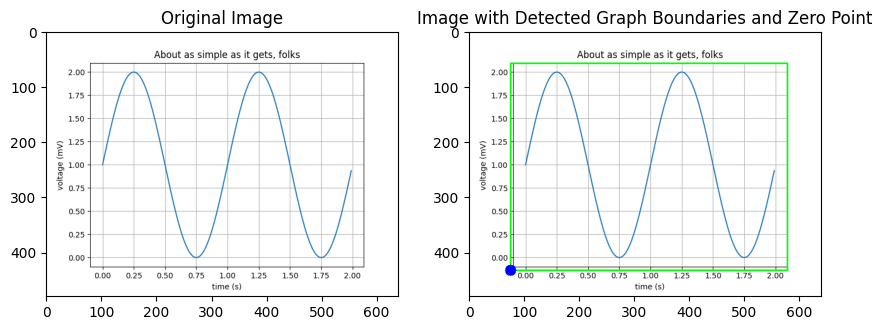

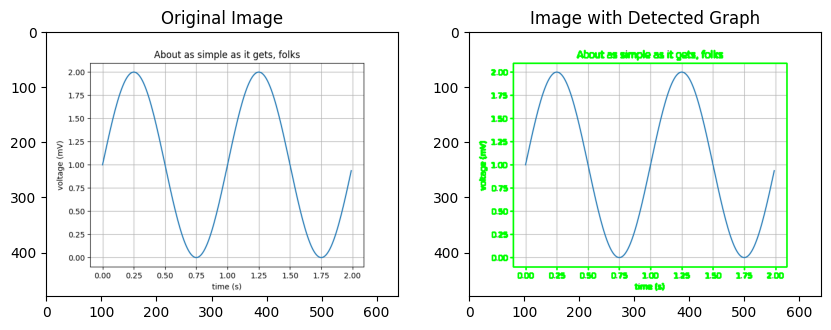

[7, 8, 8, 8, 8, 4]


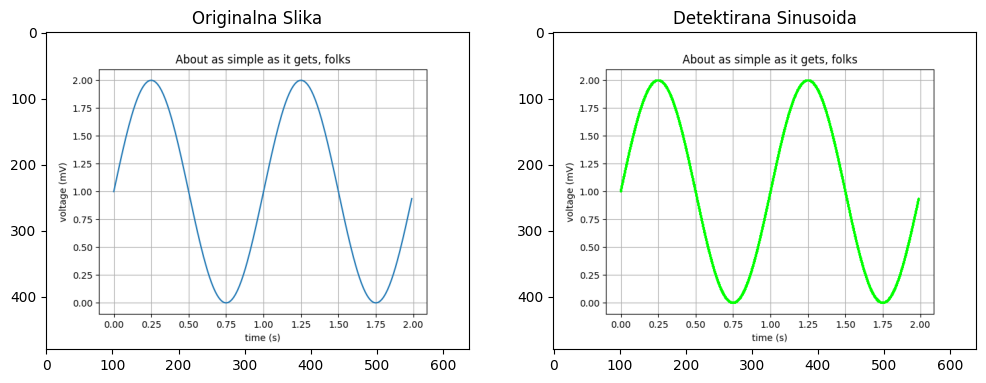

Udaljenosti grafa od x osi po stupcima:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 228, 229, 234, 239, 243, 248, 252, 257, 262, 266, 270, 275, 280, 284, 289, 293, 297, 301, 305, 310, 314, 317, 321, 325, 329, 333, 336, 340, 343, 347, 350, 353, 356, 359, 362, 365, 367, 370, 372, 375, 377, 379, 381, 383, 385, 386, 388, 389, 390, 392, 393, 393, 394, 395, 395, 396, 396, 396, 396, 395, 395, 394, 394, 393, 392, 391, 390, 388, 387, 385, 384, 382, 380, 378, 376, 373, 371, 368, 366, 363, 360, 357, 354, 351, 348, 345, 341, 338, 334, 330, 327, 323, 319, 315, 311, 307, 303, 299, 294, 290, 286, 281, 277, 272, 268, 263, 259, 254, 250, 245, 240, 236, 231, 227, 222, 217, 213, 208, 203, 199, 194, 190, 185, 181, 176, 172, 167, 163, 159, 155, 150

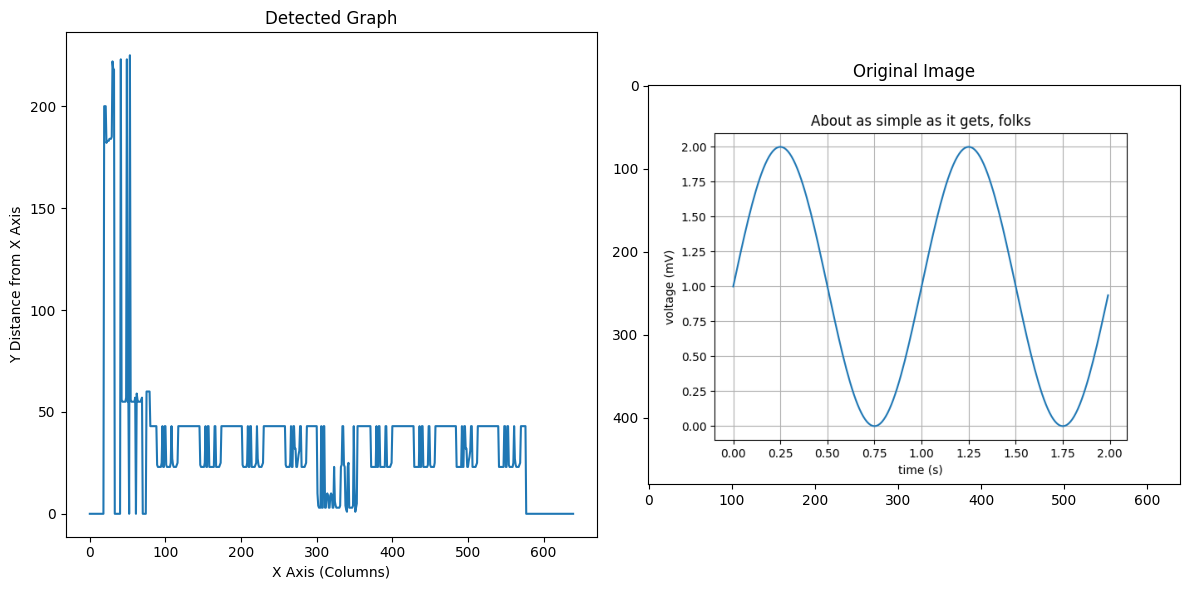

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('slik.png')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


image_contours = image.copy()


x_min, y_min, w_min, h_min = 0, 0, 0, 0
max_area = 0


for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)


    area = w * h
    if area > max_area:
        max_area = area
        x_min, y_min, w_min, h_min = x, y, w, h


zero_x = x_min
zero_y = y_min + h_min


cv2.rectangle(image_contours, (x_min, y_min), (x_min + w_min, y_min + h_min), (0, 255, 0), 2)


cv2.circle(image_contours, (zero_x, zero_y), 10, (255, 0, 0), -1)


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title("Image with Detected Graph Boundaries and Zero Point")
plt.show()


gray_new = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresh_new = cv2.threshold(gray_new, 200, 255, cv2.THRESH_BINARY_INV)


contours_new, _ = cv2.findContours(thresh_new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


image_contours_new = image.copy()


min_thickness_new = 3


for contour in contours_new:
    x, y, w, h = cv2.boundingRect(contour)

    if h > min_thickness_new or w > min_thickness_new:
        cv2.drawContours(image_contours_new, [contour], -1, (0, 255, 0), 2)


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_contours_new, cv2.COLOR_BGR2RGB))
plt.title("Image with Detected Graph")
plt.show()


gray_latest = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresh_latest = cv2.threshold(gray_latest, 200, 255, cv2.THRESH_BINARY_INV)


contours_latest, _ = cv2.findContours(thresh_latest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


if contours_latest:
    x, y, w, h = cv2.boundingRect(contours_latest[0])


column_distances = []


x_axis_y = y + h


for i in range(x, x + w):
    column = thresh_latest[y:y+h, i:i+1]


    non_zero_pixels = np.where(column != 0)[0]

    if non_zero_pixels.size > 0:
        distance = x_axis_y - (y + non_zero_pixels[0])
    else:
        distance = 0


    column_distances.append(distance)


print(column_distances[:10])


hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])


mask = cv2.inRange(hsv_image, lower_blue, upper_blue)


contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)  # Zeleno za konture


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Originalna Slika")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title("Detektirana Sinusoida")
plt.show()


hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])


mask = cv2.inRange(hsv_image, lower_blue, upper_blue)


x_axis_y = image.shape[0] - 10


distances_from_x_axis = []


for col in range(mask.shape[1]):
    for row in range(mask.shape[0] - 1, -1, -1):
        if mask[row, col] == 255:
            distance = x_axis_y - row
            distances_from_x_axis.append(distance)
            break
    else:
        distances_from_x_axis.append(0)


print("Udaljenosti grafa od x osi po stupcima:")
print(distances_from_x_axis)


with open('udaljenosti_od_x_osi.txt', 'w') as file:
    for distance in distances_from_x_axis:
        file.write(f"{distance}\n")

print("Vrijednosti su spremljene u 'udaljenosti_od_x_osi.txt'")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


image_contours = image.copy()


distances_from_x_axis = []


x_axis_y = image.shape[0] - 10


for col in range(thresh.shape[1]):
    for row in range(thresh.shape[0] - 1, -1, -1):
        if thresh[row, col] == 255:
            distance = x_axis_y - row
            distances_from_x_axis.append(distance)
            break
    else:
        distances_from_x_axis.append(0)


x_values = range(len(distances_from_x_axis))
y_values = distances_from_x_axis


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(x_values, y_values)
plt.title("Detected Graph")
plt.xlabel("X Axis (Columns)")
plt.ylabel("Y Distance from X Axis")


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")


plt.tight_layout()
plt.show()


